# VANA Assignment - Gradient Descent

Das Ziel dieser Aufgabe besteht darin, dass Sie ein grundlegendes Verständnis für numerische Näherungsverfahren in höheren Dimensionen erlangen, insbesondere für den Gradient Descent und dessen praktische Anwendung. Hierfür sollen Sie ein Jupyter Notebook erstellen und das MNIST Dataset laden und erkunden. Anschließend sollen Sie ein neuronales Netzwerk erstellen und trainieren, um die Bilder korrekt zu klassifizieren. Es dürfen nur die angegebenen Python Pakete verwendet werden.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import MNIST 

## Aufgabe 1

Laden Sie das MNIST-Dataset (Training und Test) mithilfe des torchvision-Pakets (Verwenden Sie das torchvision Paket nur für diese Aufgabe) und verwenden Sie matplotlib, um sich einen Überblick über die Daten zu verschaffen. Beschreiben Sie die grundlegenden Eigenschaften des Datensets, z.B. wie viele und welche Daten es enthält und wie diese verteilt sind.

Anzahl der Trainingsbilder: 60000
Anzahl der Testbilder: 10000
Größe der Bilder: (28, 28)


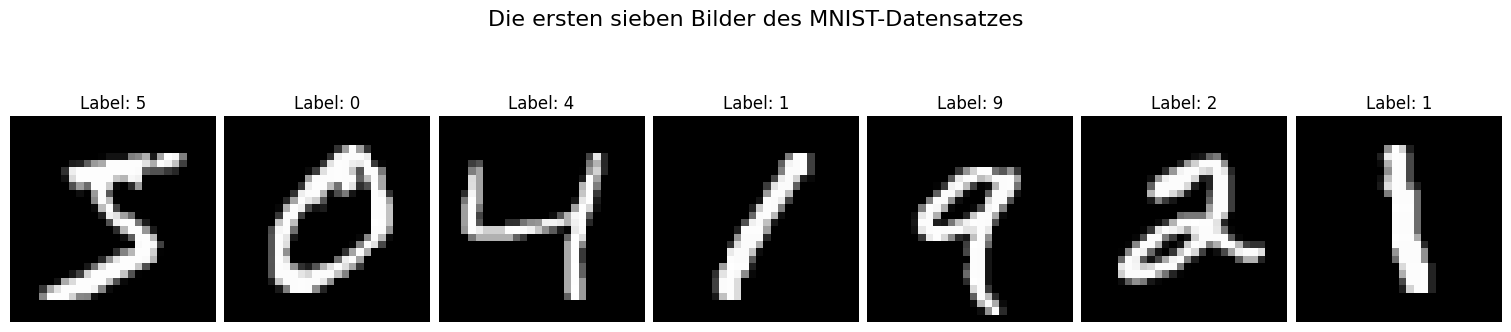

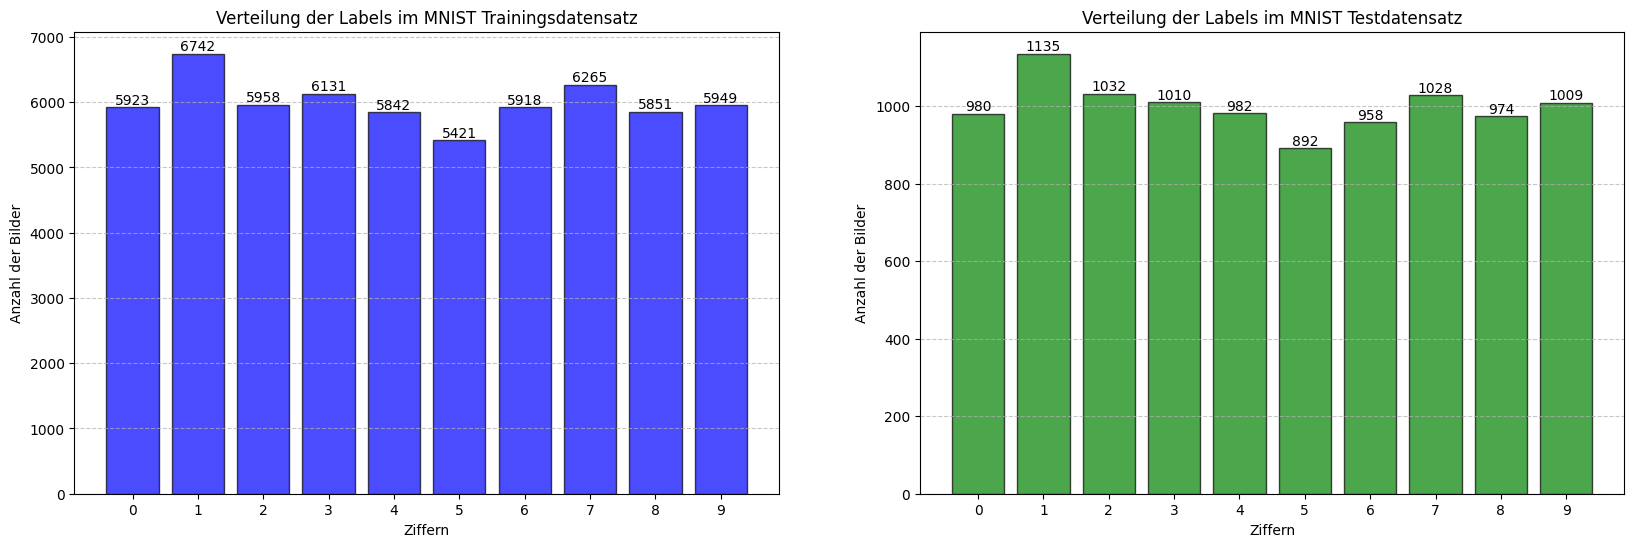

In [8]:
mnist_train = MNIST(root='./data', train=True, download=True)
mnist_test = MNIST(root='./data', train=False, download=True)

train_data = mnist_train.data.numpy()
train_labels = mnist_train.targets.numpy()
test_data = mnist_test.data.numpy()
test_labels = mnist_test.targets.numpy()

print(f'Anzahl der Trainingsbilder: {len(train_data)}')
print(f'Anzahl der Testbilder: {len(test_data)}')
print(f'Größe der Bilder: {train_data[0].shape}')

# Example images

fig, axes = plt.subplots(1, 7, figsize=(15, 4), constrained_layout=True)
for i, ax in enumerate(axes):
    ax.imshow(train_data[i], cmap='gray')
    ax.title.set_text(f'Label: {train_labels[i]}')
    ax.axis('off')
plt.suptitle('Die ersten sieben Bilder des MNIST-Datensatzes', fontsize=16)

# Distribution of the Data

fig, axes = plt.subplots(1, 2, figsize=(20, 6)) 
train_counts = np.bincount(train_labels)
test_counts = np.bincount(test_labels)

bars_train = axes[0].bar(np.arange(10), train_counts, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Verteilung der Labels im MNIST Trainingsdatensatz')
axes[0].set_xlabel('Ziffern')
axes[0].set_ylabel('Anzahl der Bilder')
axes[0].bar_label(bars_train)
axes[0].set_xticks(np.arange(10))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

bars_test = axes[1].bar(np.arange(10), test_counts, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Verteilung der Labels im MNIST Testdatensatz')
axes[1].set_xlabel('Ziffern')
axes[1].set_ylabel('Anzahl der Bilder')
axes[1].bar_label(bars_test)
axes[1].set_xticks(np.arange(10))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Aufgabe 2

Erstellen Sie eine Klasse für ein lineares Layer mit beliebig vielen Knoten. Implementieren Sie darin getrennte Methoden für Forward-Pass, Backward-Pass und Parameter-Update mithilfe von numpy. Schreiben Sie geeignete Unittests, um die Funktionsweise dieser Funktionen zu prüfen. Schreiben Sie insbesondere einen expliziten Test, für ein Layer mit 2 Knoten, welches als Input 2 Datensätzen zu je zwei 2 floats erhält. Wählen Sie dazu unterschiedliche feste Werte für Input, initiale Gewichte und Lernrate. Dann berechnen sie von Hand die Ergebnisse von Forward, Backward und Update und testen damit ihre Implementation. Legen Sie die Berechnung der Ergebnisse ihrer Lösung bei.

## Aufgabe 3

Erstellen Sie ein neuronales Netzwerk mit 3 Hidden Layern mit gleicher Anzahl Knoten und einem Output Layer mit 10 Knoten. Verwenden Sie dazu die in Aufgabe 2 implementierte Klasse. Das Ziel ist die korrekte Klassifizierung aller Ziffern. Bereiten Sie die Trainingsloop und alles dafür benötigte vor, um das Netzwerk darauf zu trainieren. Das heißt, jeder Output Knoten wird einer Ziffer zugeordnet; der Output soll 1 für diese Ziffer und 0 für alle anderen Ziffern sein. Das Netzwerk soll auf den Trainingsdaten trainieren und auf den Testdaten evaluiert werden. Achten Sie beim Training darauf, nicht auf dem gesamten Datensatz gleichzeitig zu trainieren, sondern stückeln Sie diesen in kleine Portionen (batches), auf denen nacheinander trainiert wird. Erläutern Sie kurz, warum das nötig ist. Verwenden Sie eine geeignete Kosten-Funktion sowie Evaluations-Funktion und geben Sie deren mathematische Definition an. Begründen Sie Ihre Wahl dieser Funktion und diskutieren Sie kurz eine weitere Option für Kosten und Evaluation mit einer Abwägung der Vor- und Nachteile.

## Aufgabe 4

Trainieren Sie das Netzwerk mit verschiedenen Lernraten (0.01 - 1) und Größen der Hidden Layer (4, 8, 16). Verfolgen Sie während des Trainings die Entwicklung der Kosten- und Evaluations-Funktionen sowohl auf Trainings- als auch auf Testdaten. Interpretieren Sie die Ergebnisse des Netzwerks und entscheiden Sie, welche Wahl von Lernrate und Hidden Layer-Größe die Beste ist. Begründen Sie Ihre Wahl.